In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import keras
from keras.callbacks import ModelCheckpoint
from sklearn import metrics
import tensorflow as tf
import csv

In [5]:
dataFile = "C:/Users/Swathi Pratapa/Desktop/Assignments/MLSP/AssignementOne/annotations.csv"

In [6]:
df = pd.read_csv(dataFile)
df.head()

,Unnamed: 0,fname,label,split
0,0,02639.npy,Bark,train
1,1,1580.npy,Bark,train
2,2,24030.npy,Bark,train
3,3,316499.npy,Bark,train
4,4,413718.npy,Bark,train


In [7]:
Files = df.iloc[:,1:2].values
print(Files)

[['02639.npy']
 ['1580.npy']
 ['24030.npy']
 ['316499.npy']
 ['413718.npy']
 ['517360.npy']
 ['619651.npy']
 ['72371.npy']
 ['89438.npy']
 ['912878.npy']
 ['106258.npy']
 ['1154.npy']
 ['1212571.npy']
 ['1314420.npy']
 ['1413291.npy']
 ['152922.npy']
 ['167989.npy']
 ['179024.npy']
 ['182654.npy']
 ['1919100.npy']
 ['206911.npy']
 ['213587.npy']
 ['225278.npy']
 ['233214.npy']
 ['2412414.npy']
 ['259846.npy']
 ['268897.npy']
 ['276036.npy']
 ['285503.npy']
 ['293731.npy']
 ['302526.npy']
 ['318339.npy']
 ['3213639.npy']
 ['3314128.npy']
 ['342293.npy']
 ['3519074.npy']
 ['361810.npy']
 ['379040.npy']
 ['3819730.npy']
 ['396962.npy']
 ['4015459.npy']
 ['4113306.npy']
 ['4213640.npy']
 ['43616.npy']
 ['4417081.npy']
 ['451236.npy']
 ['4612020.npy']
 ['47371.npy']
 ['487621.npy']
 ['4919899.npy']
 ['509509.npy']
 ['517655.npy']
 ['5219072.npy']
 ['5316213.npy']
 ['5412617.npy']
 ['552456.npy']
 ['568714.npy']
 ['579323.npy']
 ['5813005.npy']
 ['5913396.npy']
 ['6011263.npy']
 ['616861.npy

In [8]:
X_data = np.empty([1,128])
X_Final = np.empty([1000,16])
X_Final_N = np.empty([1000,16])
X_mean = np.empty([1,16])
Y_data = [0]*1000
for i in range(0,1000):
    File_name = Files[i]
    File_Final = File_name[0]
    Y_data[i] = df.iloc[i,2]
    file_path = 'C:/Users/Swathi Pratapa/Desktop/Assignments/MLSP/AssignementOne/train/'+File_Final
    File_Pre = np.load(file_path)
    max_value = np.max(File_Pre)
    File_Pre = File_Pre/max_value
    a, rows, cols = File_Pre.shape
    for f in range(rows):
        X_data[0,f] = np.max(File_Pre[:,f,:])
    binsize = 8
    binnum = int(rows/binsize)
    for k in range(binnum):
        X_mean[0,k] = np.mean(X_data[0,k*binsize:(k+1)*binsize])
    X_Final[i,:] = X_mean

Y_data =  np.array(Y_data)

Printing the X_data and Y_data

In [9]:
print(X_Final.shape)
print(Y_data)

(1000, 16)
['Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark'
 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark'
 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark'
 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark'
 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark'
 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark'
 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark'
 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark'
 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark'
 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark' 'Bark'
 'Meow' 'Meow' 'Meow' 'Meow' 'Meow' 'Meow' 'Meow' 'Meow' 'Meow' 'Meow'
 'Meow' 'Meow' 'Meow' 'Meow' 'Meow' 'Meow' 'Meow' 'Meow' 'Meow' 'Meow'
 'Meow' 'Meow' 'Meow' 'Meow' 'Meow' 'Meow' 'Meow' 'Meow' 'Meow' 'Meow'
 'Meow' 'Meow' 'Meow' 'Meow' 'Meow' 'Meow' 'Meow' 'Meow' 'Meow' 'M

Finding a plot for all the classes to see if they have distinctive features when trying to pre-process

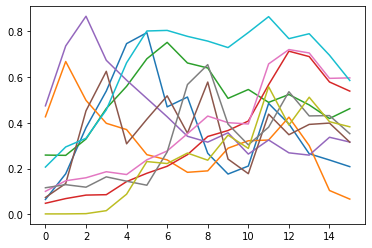

In [10]:
plt.plot(range(16),X_Final[4,:])
plt.plot(range(16),X_Final[104,:])
plt.plot(range(16),X_Final[204,:])
plt.plot(range(16),X_Final[304,:])
plt.plot(range(16),X_Final[404,:])
plt.plot(range(16),X_Final[504,:])
plt.plot(range(16),X_Final[604,:])
plt.plot(range(16),X_Final[704,:])
plt.plot(range(16),X_Final[804,:])
plt.plot(range(16),X_Final[904,:])

In [43]:
Y_data_New = Y_data.ravel()
Y_data_Rev = np.resize(np.transpose(Y_data),(1000,1))
print(Y_data_Rev.shape)
en = LabelEncoder()
y_encoded =en.fit_transform(Y_data_New)
y_encoded_onehot = pd.get_dummies(y_encoded).values
print((y_encoded_onehot).shape)

(1000, 1)
(1000, 10)


In [12]:
Train_Data = np.empty([1000,26])
Train_Data[:,0:16]=X_Final
Train_Data[:,16:26]=y_encoded_onehot
np.random.shuffle(Train_Data)
X_Final_N = Train_Data[:,0:16]
y_encoded_onehot = Train_Data[:,16:26]

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X_Final_N, y_encoded_onehot, test_size=0.1, random_state=0)

In [169]:
# # Defining a simple fully connected neural network
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(10, activation='sigmoid'),
# #    tf.keras.layers.Dense(10, activation='tanh'),
#     tf.keras.layers.Dense(10, activation='softmax')
#   ])
# model

In [14]:
# model = keras.models.load_model(filepath)

# opt = tf.keras.optimizers.Adam(learning_rate=0.001)

# # Model compilation
# model.compile(optimizer=opt, 
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

filepath = 'my_best_model.hdf5'
# checkpoint = ModelCheckpoint(filepath=filepath, 
#                              monitor='val_loss',
#                              verbose=1, 
#                              save_best_only=True,
#                              mode='min')
# callbacks = [checkpoint]


# # Model training
# model.fit(X_train, Y_train, batch_size = 16, epochs= 200, validation_data = (X_test, Y_test) , callbacks = callbacks)

In [15]:
model1 = keras.models.load_model(filepath)

In [16]:
# Evaluate the model with test data
loss, accuracy = model1.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.9440263509750366
Test accuracy: 0.6299999952316284


In [17]:
# Predict test data
y_pred = model1.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [45]:
# Print groundtruth and predicted class labels 
actual = np.argmax(Y_test,axis=1)
predicted = np.argmax(y_pred,axis=1)
print(f"Ground Truth: {actual}")
print(f"Predicted: {predicted}")

Ground Truth: [7 3 7 7 2 3 3 3 3 8 4 8 8 9 2 9 9 3 6 1 6 9 8 9 5 4 9 5 6 2 6 8 5 0 7 4 5
 5 8 0 7 6 8 4 3 9 0 6 4 3 6 3 5 9 0 3 1 7 8 1 7 3 1 5 8 5 4 7 6 9 4 7 5 8
 4 8 2 2 8 8 5 9 1 0 5 4 7 7 9 3 5 6 9 6 9 1 7 4 1 4]
Predicted: [3 3 0 7 4 3 1 3 9 8 5 8 8 9 2 3 9 7 1 1 6 9 8 9 5 7 9 5 6 2 6 8 4 0 7 4 9
 9 9 0 0 6 8 4 3 1 0 6 4 5 6 3 5 6 5 6 1 7 8 0 7 9 1 4 8 9 4 7 6 5 1 7 5 8
 4 8 2 2 8 7 9 1 4 0 5 4 3 7 5 6 5 6 7 6 5 1 3 4 1 8]


# Calculating Metrics

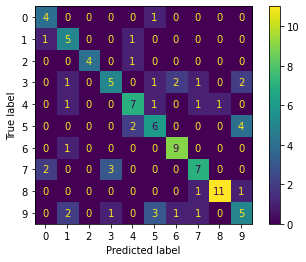

In [19]:
confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4,5,6,7,8,9])

cm_display.plot()

plt.show()

In [20]:
Accuracy = metrics.accuracy_score(actual, predicted)
print(Accuracy)

0.63


In [21]:
Precision_eachclass = metrics.precision_score(actual, predicted,average = None)
print(Precision_eachclass)
Precision = metrics.precision_score(actual, predicted,average = 'weighted')
print(Precision)

[0.57142857 0.5        1.         0.55555556 0.63636364 0.5
 0.75       0.63636364 0.91666667 0.41666667]
0.6349350649350649


In [22]:
Sensitivity_recall = metrics.recall_score(actual, predicted,average = 'weighted')
print(Sensitivity_recall)

0.63


In [23]:
F1_score = metrics.f1_score(actual, predicted, average = 'weighted')
print(F1_score)

0.6273587655879216


Exporting the output for the test files

In [50]:
X_Test_Names = [0]*100
ypredtest_Names = [0]*100
Final_Test_Results = np.empty([100,2])
for i in range(X_test.shape[0]):
    for j in range(X_Final.shape[0]):
        if np.array_equal(X_test[i,:], X_Final[j,:]):
            fieldid = Files[j]
            Filename_Test = fieldid[0]
            X_Test_Names[i] = Filename_Test
X_Test_Names = np.transpose(np.array([X_Test_Names]))

for i in range(100):
    if predicted[i] == 0 :
        ypredtest_Names[i] = 'Bark'
    elif predicted[i] == 1 :
        ypredtest_Names[i] = 'Crying_and_sobbing'
    elif predicted[i] == 2 :
        ypredtest_Names[i] = 'Doorbell'
    elif predicted[i] == 3 :
        ypredtest_Names[i] = 'Knock'
    elif predicted[i] == 4 :
        ypredtest_Names[i] = 'Meow'
    elif predicted[i] == 5 :
        ypredtest_Names[i] = 'Microwave_oven'
    elif predicted[i] == 6 :
        ypredtest_Names[i] = 'Shatter'
    elif predicted[i] == 7 :
        ypredtest_Names[i] = 'Siren'
    elif predicted[i] == 8 :
        ypredtest_Names[i] = 'Vehicle_horn_and_car_horn_and_honking'
    elif predicted[i] == 9 :
        ypredtest_Names[i] = 'Walk_and_footsteps'

        
ypredtest_Names = np.transpose(np.array([ypredtest_Names]))
Final_Test_Results = np.hstack((X_Test_Names, ypredtest_Names))

In [51]:
Final_Test_Results = np.vstack(([['fieldid', 'prediction']], Final_Test_Results))
with open ('ANN_Predicted.csv','w',newline = '') as csvfile:
    my_writer = csv.writer(csvfile, delimiter = ' ')
    my_writer.writerows(Final_Test_Results)